For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



Has the network latency gone up since we switched internet service providers?


Null hypothesis: There is no difference in network latency between ISP 1 and ISP 2<br>
Alternative hypothesis: There is a difference in network latency between ISP 1 and ISP 2<br>
True positive: There is a difference<br>
True negative: There is no difference<br>
Type I error: Concluding that there is a difference when there is in fact no difference<br>
Type II error: Concluding there is no difference when there is in fact a difference<br>

Is the website redesign any good?


Null hypothesis: There is no difference in website performance between version 1 and version 2<br>
Alternative hypothesis: There is a difference in website performance between version 1 and version 2<br>
True positive: There is a difference<br>
True negative: There is no difference<br>
Type I error: Concluding that there is a difference when there is in fact no difference<br>
Type II error: Concluding there is no difference when there is in fact a difference<br>

Is our television ad driving more sales?

Null hypothesis: There is no difference in sales before TV ad went out and sales after TV ad went out<br>
Alternative hypothesis: There is a difference in sales before TV ad went out and sales after TV ad went out<br>
True positive: There is a difference<br>
True negative: There is no difference<br>
Type I error: Concluding that there is a difference when there is in fact no difference<br>
Type II error: Concluding there is no difference when there is in fact a difference<br>

In [3]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

T-Test Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [2]:
office_one_mean = 90
office_one_stddev = 15

office_two_mean = 100
office_two_stddev = 20

alpha = 0.05

**Hypothesis**

$H_{0}$: average time it takes to sell homes at office one == average time it takes to sell homes at office two

$H_{a}$: average time it takes to sell homes at office one > average time it takes to sell homes at office two

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: no

In [3]:
office_one_variance = office_one_stddev**2
office_two_variance = office_two_stddev**2

office_one_variance, office_two_variance

(225, 400)

In [4]:
office_one = np.random.normal(office_one_mean, office_one_stddev, 40)
office_two = np.random.normal(office_one_mean, office_one_stddev, 50)

In [5]:
t, p = stats.ttest_ind(office_one, office_two, equal_var=False)

t, p, alpha

(-0.5667796998573373, 0.5723770047277229, 0.05)

In [6]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


Load the mpg dataset and use it to answer the following questions:

In [7]:
mpg_df = data('mpg')
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
mpg_df['avg_fe'] = stats.hmean(mpg_df[['cty', 'hwy']], axis=1)

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**Hypothesis**

$H_{0}$: average hwy mpg for 1999 cars == average hwy mpg for 2008 cars

$H_{a}$: average hwy mpg for 1999 cars =! average hwy mpg for 2008 cars

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: no

In [9]:
cars_1999 = mpg_df[mpg_df.year == 1999].avg_fe
cars_2008 = mpg_df[mpg_df.year == 2008].avg_fe

In [10]:
cars_1999.var(), cars_2008.var()

(25.850396545865912, 22.550836772260343)

In [11]:
t, p = stats.ttest_ind(cars_1999, cars_2008, equal_var=False)
t, p, alpha

(0.3011962975077886, 0.7635358418225436, 0.05)

In [12]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


Are compact cars more fuel-efficient than the average car?

In [13]:
mpg_df = mpg_df.rename(columns={'class': 'classoc'})

In [14]:
cars = mpg_df.avg_fe
compact_cars = mpg_df[mpg_df.classoc == 'compact'].avg_fe

**Hypothesis**

$H_{0}$: average hwy mpg for compact cars == average hwy mpg for all cars

$H_{a}$: average hwy mpg for compact cars > average hwy mpg for all cars

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!

In [15]:
t, p = stats.ttest_1samp(compact_cars, cars.mean())
t, p, alpha

(7.512360093161354, 1.5617666348807727e-09, 0.05)

In [16]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Do manual cars get better gas mileage than automatic cars?

In [17]:
mpg_df.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [18]:
manual = mpg_df[mpg_df.trans.str.contains('manual')].avg_fe
automatic = mpg_df[mpg_df.trans.str.contains('auto')].avg_fe

**Hypothesis**

$H_{0}$: average hwy mpg for compact cars == average hwy mpg for all cars

$H_{a}$: average hwy mpg for compact cars > average hwy mpg for all cars

**Significance Level**

$\alpha$ is already set to .05 (95% cofidence level)

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: no

In [19]:
t, p = stats.ttest_ind(manual, automatic, equal_var=False)
t, p, alpha

(4.47444321386703, 1.598070270207952e-05, 0.05)

In [20]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Correlation Exercises

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [134]:
df = pd.read_csv("Cust_Churn_Telco.csv")  

In [135]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
x = df.tenure
y = df.MonthlyCharges

In [137]:
r, p = stats.pearsonr(x, y)
r, p

(0.24789985628615002, 4.0940449915016345e-99)

There doesn't seem to be much correlation between tenure and monthly charges.

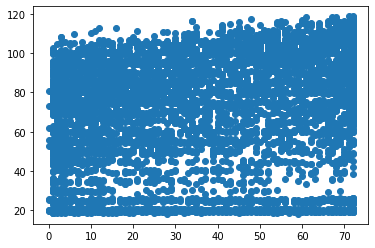

In [25]:
plt.scatter(x, y)

In [138]:
df.TotalCharges = (df.TotalCharges+'0').astype(float)

In [139]:
y = df.TotalCharges

In [140]:
r, p = stats.pearsonr(x, y)
r, p

(0.3896319744941455, 4.382201025264291e-254)

There also doesn't seem to be much correlation between tenure and total charges.

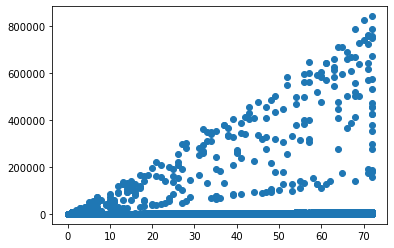

In [73]:
plt.scatter(x, y)

In [75]:
customers_with_phone_service = df[df.PhoneService == 'Yes']
customers_with_phone_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [121]:
x = customers_with_phone_service.tenure
y = customers_with_phone_service.MonthlyCharges
r, p = stats.pearsonr(x, y)
r, p

(0.24538898585362878, 7.117871077967264e-88)

If you only consider customers with phone service, there still isn't a correlation.

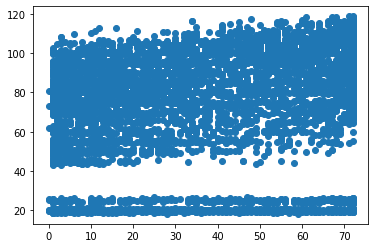

In [78]:
plt.scatter(x, y)

In [76]:
customers_without_phone_service = df[df.PhoneService == 'No']
customers_without_phone_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


In [79]:
x = customers_without_phone_service.tenure
y = customers_without_phone_service.MonthlyCharges
r, p = stats.pearsonr(x, y)
r, p

(0.5857597986661367, 4.6033703473423134e-64)

There is a slight positive correlation in tenure and monthly charges for customers without phone service.

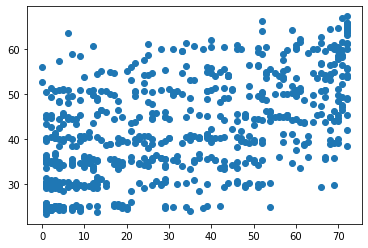

In [80]:
plt.scatter(x, y)

Use the employees database

In [16]:
from env import host, user, password, get_db_url

In [97]:
florence06 = get_db_url(user, host, password, 'florence06')

In [111]:
formers = pd.read_sql('SELECT * FROM final', florence06)

In [113]:
formers.end_date = pd.to_datetime(formers.end_date)

In [115]:
formers.hire_date = pd.to_datetime(formers.hire_date)

In [126]:
x = formers.end_date-formers.hire_date
y = formers.salary

In [129]:
x = pd.to_numeric(x)

In [130]:
x

0         1100563200000000000
1         1119312000000000000
2         1095120000000000000
3         1086912000000000000
4          999129600000000000
                 ...         
300019     907286400000000000
300020     908582400000000000
300021    1096588800000000000
300022    1009756800000000000
300023    1114819200000000000
Length: 300024, dtype: int64

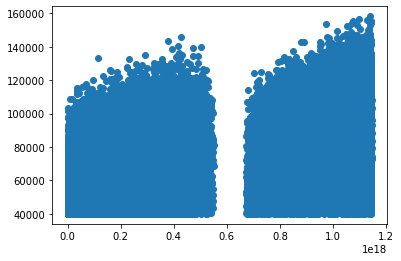

In [131]:
plt.scatter(x, y)

In [133]:
r, p = stats.pearsonr(x, y)
r, p

(0.32508455438083034, 0.0)

Chi Square

1.) Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


In [1]:
a = 0.01

In [4]:
index = ['mac_user', 'not_mac_user']
columns = ['Codeup_student', 'Non_Codeup_student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

In [5]:
observed

,Codeup_student,Non_Codeup_student
mac_user,49,20
not_mac_user,1,30


In [6]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [7]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [8]:
if p < a:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


There is evidence to suggest that being a mac user and codeup student are not independent.

2.) Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.



Null hypothesis: Transmission and class type are independent.<br>
Alternative hypothesis: Transmission and class type are not independent.

In [9]:
mpg_df = data('mpg')

In [10]:
mpg_df['transmission'] = mpg_df['trans'].str[:4]

In [11]:
observed = pd.crosstab(mpg_df.transmission, mpg_df['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
transmission,,,,,,,
auto,2,24,29,11,20,16,55
manu,3,23,12,0,13,19,7


In [12]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [13]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 2 24 29 11 20 16 55]
 [ 3 23 12  0 13 19  7]]
---
Expected

[[ 3.35470085 31.53418803 27.50854701  7.38034188 22.14102564 23.48290598
  41.5982906 ]
 [ 1.64529915 15.46581197 13.49145299  3.61965812 10.85897436 11.51709402
  20.4017094 ]]
---

chi^2 = 33.7700
p     = 0.0000


In [14]:
if p < a:
    print("Reject null hypothesis, transmission and class type are not independent")
else:
    print("Fail to reject null hypothesis, transmission and class type are independent")

Reject null hypothesis, transmission and class type are not independent


3.) Use the data from the employees database to answer these questions:

In [17]:
url = get_db_url(user, host, password, 'employees')

In [18]:
employees = pd.read_sql("""select emp_no, dept_no, from_date, to_date, gender, dept_name 
from dept_emp
join employees using(emp_no)
join departments using(dept_no)
where to_date > curdate() and dept_name IN ('Sales', 'Marketing')
""",url)

In [19]:
employees.head()

,emp_no,dept_no,from_date,to_date,gender,dept_name
0,10017,d001,1993-08-03,9999-01-01,F,Marketing
1,10058,d001,1988-04-25,9999-01-01,M,Marketing
2,10140,d001,1991-03-14,9999-01-01,F,Marketing
3,10228,d001,1993-01-28,9999-01-01,F,Marketing
4,10239,d001,1996-05-04,9999-01-01,F,Marketing


3a.) Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees<br>
Null hypothesis: Gender and whether the employee works in sales or marketing are independent.<br>
Alternative hypothesis: Gender and whether the employee works in sales or marketing are not independent.

In [20]:
observed = pd.crosstab(employees.gender,employees.dept_name)

In [21]:
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [22]:
chi2, p ,degf, expected = stats.chi2_contingency(observed)

In [23]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


In [24]:
if p < a:
    print("Reject null hypothesis, gender and whether they are in the sales or marketing department are not independent")
else:
    print("Fail to reject null hypothesis, gender and whether they are in sales or the marketing department are independent")

Fail to reject null hypothesis, gender and whether they are in sales or the marketing department are independent


3b.) Is an employee's gender independent of whether or not they are or have been a manager?<br>
Null hypothesis: An employee's gender and whether or not they are or have been a manager are independent.<br>
Alternative hypothesis: An employee's gender and whether or not they are or have been a manager are not independent.

In [25]:
managers = pd.read_sql("""select emp_no from dept_manager""",url)
managers

,emp_no
0,110022
1,110039
2,110085
3,110114
4,110183
5,110228
6,110303
7,110344
8,110386
9,110420


In [26]:
employees = pd.read_sql("""select * from employees
""",url)

In [27]:
managers = managers.to_numpy()

In [28]:
def manager(emp_no):
    if emp_no in managers:
        return True
    else: 
        return False

In [29]:
employees['is_manager'] = employees.emp_no.apply(manager)

In [30]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,False


In [31]:
observed = pd.crosstab(employees.gender, employees.is_manager)

In [32]:
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [33]:
chi2, p ,degf, expected = stats.chi2_contingency(observed)

In [34]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]
---

chi^2 = 1.4567
p     = 0.2275


In [35]:
if p < a:
    print("Reject null hypothesis, gender and whether they have been a manager are not independent")
else:
    print("Fail to reject null hypothesis, gender and whether they have been a manager are independent")

Fail to reject null hypothesis, gender and whether they have been a manager are independent
